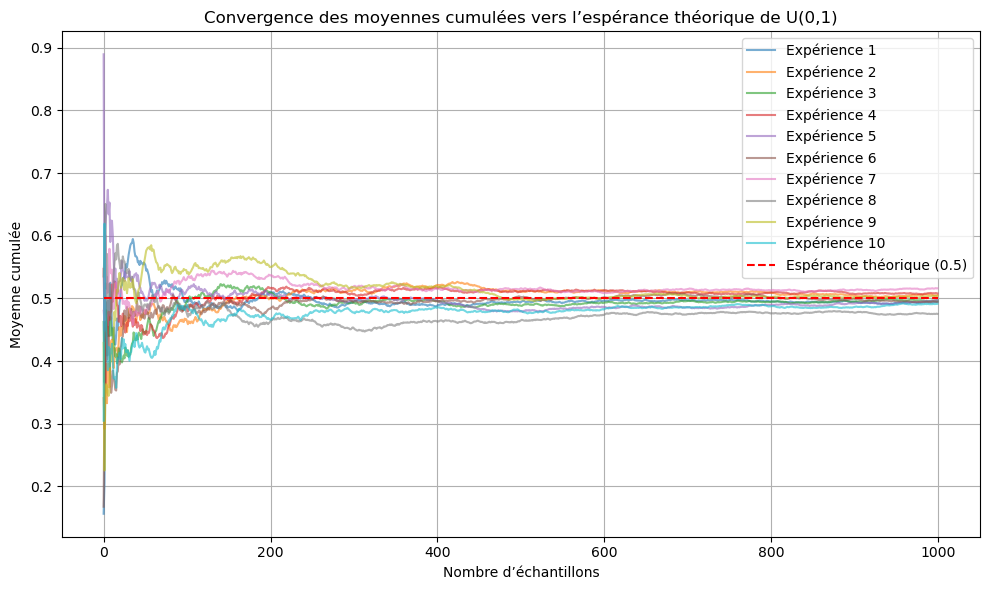

In [1]:
#Exercice1:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n = 1000           # Nombre d’échantillons dans une expérience
repeats = 10       # Nombre de répétitions de l’expérience

# Espérance théorique
expected_mean = 0.5

# Préparation de la figure
plt.figure(figsize=(10, 6))

# Répéter l’expérience plusieurs fois
for i in range(repeats):
    # 1. Générer n réalisations de X ~ U(0, 1)
    X = np.random.uniform(0, 1, n)
    
    # 2. Calculer les moyennes cumulées
    cumulative_means = np.cumsum(X) / np.arange(1, n + 1)
    
    # Tracer la moyenne cumulée
    plt.plot(cumulative_means, label=f'Expérience {i+1}', alpha=0.6)

# Tracer la ligne de l'espérance théorique
plt.hlines(expected_mean, 0, n, colors='red', linestyles='dashed', label='Espérance théorique (0.5)')

# Mise en forme du graphique
plt.title('Convergence des moyennes cumulées vers l’espérance théorique de U(0,1)')
plt.xlabel('Nombre d’échantillons')
plt.ylabel('Moyenne cumulée')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


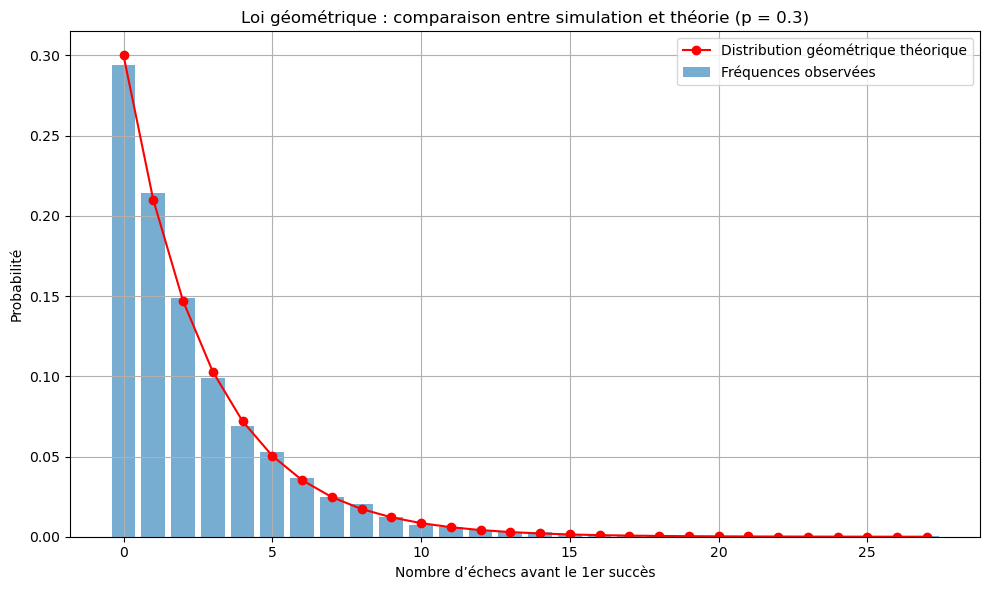

In [3]:
#Exercice3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# Paramètres
p = 0.3             # Probabilité de succès
n = 10000           # Nombre de simulations

# 1. Simulation de la variable géométrique
# scipy.stats.geom retourne le nombre de tentatives avant le succès, donc X ~ Geom(p) donne k+1
# Pour avoir le nombre d'échecs avant le succès, on fait -1
simulations = geom.rvs(p, size=n) - 1

# 2. Histogramme des fréquences observées
max_k = np.max(simulations)
values, counts = np.unique(simulations, return_counts=True)
frequencies = counts / n

# 3. Distribution théorique
k_vals = np.arange(0, max_k + 1)
pmf_theorique = geom.pmf(k_vals + 1, p)  # +1 pour ajuster à la version scipy (nombre d'essais)

# Tracé
plt.figure(figsize=(10, 6))
plt.bar(values, frequencies, width=0.8, alpha=0.6, label="Fréquences observées")
plt.plot(k_vals, pmf_theorique, 'ro-', label="Distribution géométrique théorique")

# Mise en forme
plt.title(f"Loi géométrique : comparaison entre simulation et théorie (p = {p})")
plt.xlabel("Nombre d’échecs avant le 1er succès")
plt.ylabel("Probabilité")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
#Exercice5
P = [[0.1, 0.6, 0.3],
     [0.4, 0.3, 0.3],
     [0.2, 0.5, 0.3]]


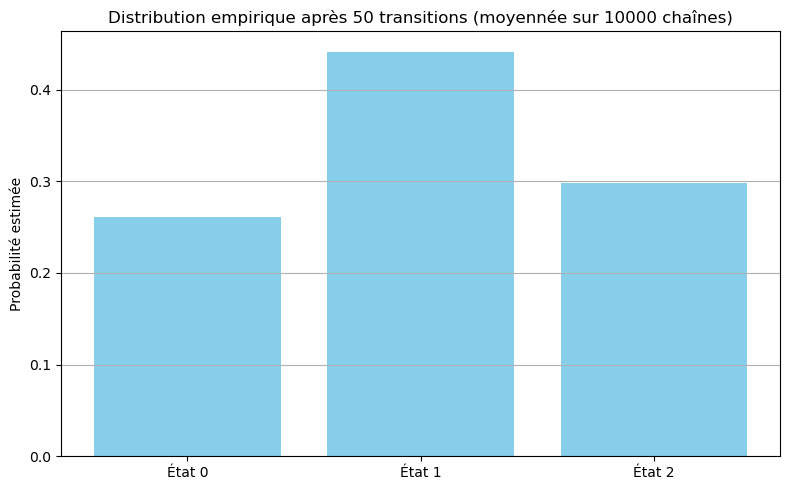

Probabilité empirique d’être dans l’état 0 après 50 transitions : 0.2608
Probabilité empirique d’être dans l’état 1 après 50 transitions : 0.4415
Probabilité empirique d’être dans l’état 2 après 50 transitions : 0.2977


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Matrice de transition
P = np.array([
    [0.1, 0.6, 0.3],
    [0.4, 0.3, 0.3],
    [0.2, 0.5, 0.3]
])

# Paramètres
n = 50            # Longueur de la trajectoire
N = 10000         # Nombre de trajectoires simulées
nb_etats = P.shape[0]

# 2. Simulation de trajectoires
états_finaux = []

for _ in range(N):
    etat = np.random.choice(nb_etats)  # État initial aléatoire
    for _ in range(n):
        etat = np.random.choice(nb_etats, p=P[etat])  # Transition
    états_finaux.append(etat)

# 3. Estimation empirique
états_finaux = np.array(états_finaux)
probas_empiriques = np.bincount(états_finaux, minlength=nb_etats) / N

# Affichage
états = [f"État {i}" for i in range(nb_etats)]

plt.figure(figsize=(8, 5))
plt.bar(états, probas_empiriques, color='skyblue')
plt.title(f"Distribution empirique après {n} transitions (moyennée sur {N} chaînes)")
plt.ylabel("Probabilité estimée")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Affichage dans le terminal
for i, p in enumerate(probas_empiriques):
    print(f"Probabilité empirique d’être dans l’état {i} après {n} transitions : {p:.4f}")


In [10]:
#Exercice7
import numpy as np

# Paramètres
mu = 5              # Moyenne
sigma = 2           # Écart-type (donc variance = 4)
var = sigma**2
n = 100             # Nombre de variables par simulation
N = 10000           # Nombre de répétitions
epsilon = 0.5       # Seuil ε pour l'événement

# 1. Simulation des N moyennes empiriques de n variables iid
X = np.random.normal(loc=mu, scale=sigma, size=(N, n))
X_bar = X.mean(axis=1)

# 2. Calcul de la fréquence empirique de l’événement |X̄ₙ - μ| ≥ ε
ecarts = np.abs(X_bar - mu) >= epsilon
freq_empirique = np.mean(ecarts)

# 3. Borne théorique de Tchebychev
borne_tchebychev = var / (n * epsilon**2)

# Affichage
print(f"Fréquence empirique : P(|X̄ₙ - μ| ≥ ε) ≈ {freq_empirique:.4f}")
print(f"Borne de Tchebychev : P(|X̄ₙ - μ| ≥ ε) ≤ {borne_tchebychev:.4f}")


Fréquence empirique : P(|X̄ₙ - μ| ≥ ε) ≈ 0.0110
Borne de Tchebychev : P(|X̄ₙ - μ| ≥ ε) ≤ 0.1600


In [12]:
#exercice9
def aitken(u):
    """
    Applique la méthode d'Aitken Δ² à une suite u.
    u : tableau/list de réels (au moins de longueur 3)
    Retourne : liste contenant la suite accélérée u'
    """
    u = np.array(u)
    n = len(u)
    u_prime = []

    for i in range(n - 2):
        delta1 = u[i+1] - u[i]
        delta2 = u[i+2] - 2*u[i+1] + u[i]
        if delta2 != 0:
            u_aitken = u[i] - (delta1**2) / delta2
            u_prime.append(u_aitken)
        else:
            u_prime.append(np.nan)  # ou u[i], selon préférence

    return np.array(u_prime)


In [14]:
#exercice11
import math

def convergents_sqrt2(n_terms):
    # Terme initial
    a = [1] + [2] * (n_terms - 1)

    # Initialisation des numérateurs et dénominateurs
    p = [a[0], a[0]*a[1] + 1]
    q = [1, a[1]]

    for n in range(2, n_terms):
        p_n = a[n] * p[n-1] + p[n-2]
        q_n = a[n] * q[n-1] + q[n-2]
        p.append(p_n)
        q.append(q_n)

    return list(zip(p, q))

# Comparaison avec math.sqrt(2)
n = 10
convergents = convergents_sqrt2(n)
sqrt2 = math.sqrt(2)

print(f"{'n':<3} {'p/q':<20} {'Approximation':<15} {'Erreur absolue'}")
for i, (p, q) in enumerate(convergents):
    approx = p / q
    error = abs(approx - sqrt2)
    print(f"{i:<3} {f'{p}/{q}':<20} {approx:<15.10f} {error:.2e}")


n   p/q                  Approximation   Erreur absolue
0   1/1                  1.0000000000    4.14e-01
1   3/2                  1.5000000000    8.58e-02
2   7/5                  1.4000000000    1.42e-02
3   17/12                1.4166666667    2.45e-03
4   41/29                1.4137931034    4.20e-04
5   99/70                1.4142857143    7.22e-05
6   239/169              1.4142011834    1.24e-05
7   577/408              1.4142156863    2.12e-06
8   1393/985             1.4142131980    3.64e-07
9   3363/2378            1.4142136249    6.25e-08


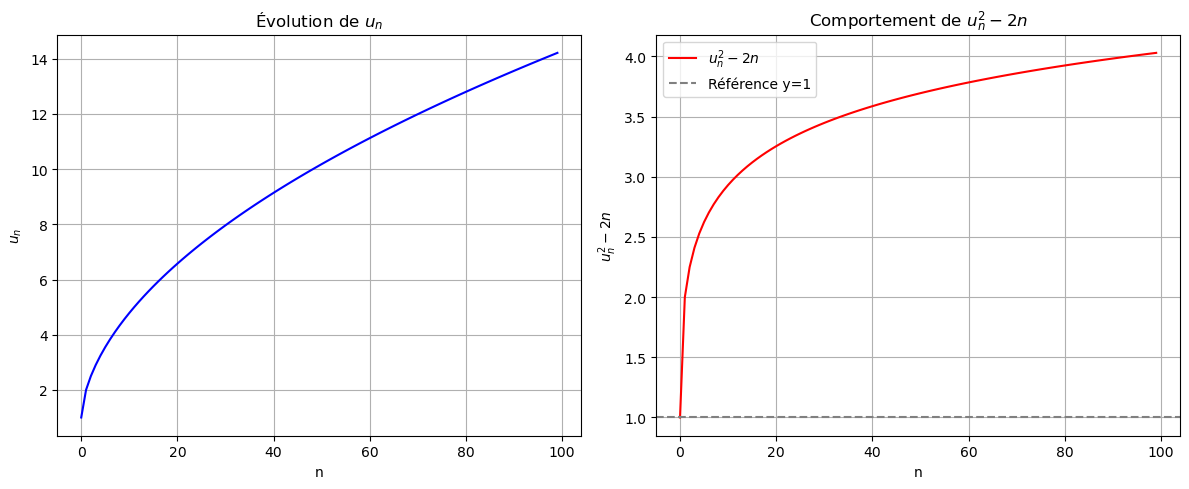

In [16]:
#Exercice13
import numpy as np
import matplotlib.pyplot as plt

def suite_un(n_terms):
    u = [1.0]  # u₀ = 1
    for _ in range(1, n_terms):
        u_next = u[-1] + 1 / u[-1]
        u.append(u_next)
    return np.array(u)

# Génération
n = 100
u = suite_un(n)
n_vals = np.arange(n)

# Calcul de u_n^2 - 2n
asympt = u**2 - 2 * n_vals

# Tracés
plt.figure(figsize=(12, 5))

# uₙ
plt.subplot(1, 2, 1)
plt.plot(n_vals, u, label='$u_n$', color='blue')
plt.title("Évolution de $u_n$")
plt.xlabel("n")
plt.ylabel("$u_n$")
plt.grid(True)

# uₙ² - 2n
plt.subplot(1, 2, 2)
plt.plot(n_vals, asympt, label="$u_n^2 - 2n$", color='red')
plt.axhline(y=1, color='gray', linestyle='--', label='Référence y=1')
plt.title("Comportement de $u_n^2 - 2n$")
plt.xlabel("n")
plt.ylabel("$u_n^2 - 2n$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
